In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("training.csv", encoding='latin-1', header=None)


In [3]:
# from sklearn.model_selection import train_test_split
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop([1,2,3,4], axis = 1)
df.columns = ["Sentiment", "Tweet"]

In [5]:
# df[df['Sentiment'] == 4] = 1

In [6]:
df["Sentiment"] = df["Sentiment"].map({0:0, 4:1})

In [7]:
df[df['Sentiment']==1].head() #Positive

,Sentiment,Tweet
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [8]:
df[df['Sentiment']==0].head() #Negative

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["Tweet"], df["Sentiment"], test_size=0.33, random_state=100)

In [10]:
X_train.count()

1072000

In [11]:
X_test.count()

528000

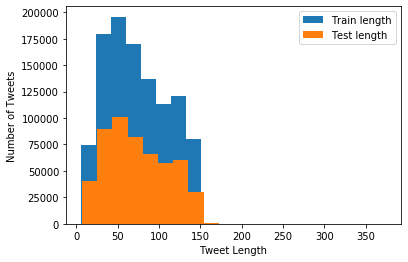

In [12]:
train_length = X_train.str.len()
test_length = X_test.str.len()


plt.hist(train_length, bins=20, label="Train length")
plt.hist(test_length, bins=20, label="Test length")
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.legend()
plt.show()

In [13]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [14]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [15]:
train["clean_tweet"] = np.vectorize(remove_pattern)(train["Tweet"], "@[\w]*")

In [18]:
%%time
test["clean_tweet"] = np.vectorize(remove_pattern)(test["Tweet"], "@[\w]*")

CPU times: user 16.6 s, sys: 1.4 s, total: 18 s
Wall time: 20.3 s


In [19]:
%%time
train["clean_tweet"] = train["clean_tweet"].str.replace("[^a-zA-Z#]", " ")
test["clean_tweet"] = test["clean_tweet"].str.replace("[^a-zA-Z#]", " ")

CPU times: user 8.92 s, sys: 185 ms, total: 9.11 s
Wall time: 9.82 s


In [21]:
%%time
train["clean_tweet"] = train["clean_tweet"].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
test["clean_tweet"] = test["clean_tweet"].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))

CPU times: user 3.66 s, sys: 77.8 ms, total: 3.74 s
Wall time: 3.89 s


In [22]:
train_tokenized = train["clean_tweet"].apply(lambda x: x.split())
test_tokenized = test["clean_tweet"].apply(lambda x: x.split())


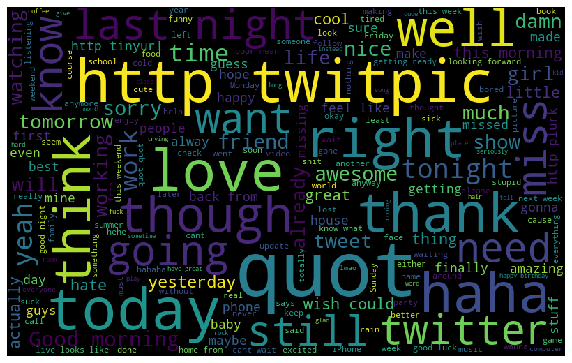

CPU times: user 52 s, sys: 4.38 s, total: 56.4 s
Wall time: 1min 1s


In [29]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in train['clean_tweet']])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()

In [25]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in train['clean_tweet'][train['Sentiment'] == 0]])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
%%time
from wordcloud import WordCloud

train_words = ' '.join([text for text in train['clean_tweet'][train['Sentiment'] == 0]])
train_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(train_words)

plt.figure(figsize=(10,7))
plt.imshow(train_wordcloud)
plt.axis('off')
plt.show()